## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
import tensorflow as tf
import keras

#from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

32768/29515 [=================================] - 0s 0us/step


Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step


### Find no.of samples are there in training and test datasets

In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


### Find dimensions of an image in the dataset

In [4]:
x_train[0].shape

(28, 28)

In [5]:
x_train[0].dtype

dtype('uint8')

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [7]:
import pandas as pd

pd.value_counts(y_train)

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
# pd.value_counts(y_train)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [0]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
# Normalize the data
# x_n = tf.nn.l2_normalize(x,1)
x_train = x_train / 255
x_test = x_test/ 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [12]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_train.shape

x_test = x_test.reshape(10000, 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
# from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)



In [14]:
print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [15]:
print('--- THE Target DATA ---')
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


--- THE Target DATA ---
y_train shape: (60000, 10)
y_test shape: (10000, 10)


### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
# Build the Graph
# Initialize Sequential model
# model = tf.keras.models.Sequential()

TRAIN = False
BATCH_SIZE = 32
EPOCH = 10

In [17]:
    # Define model
    model2conv = Sequential()

    # 1st Conv Layer
    model2conv.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model2conv.add(Activation('relu'))

    # 2nd Conv Layer
    model2conv.add(Convolution2D(32, 3, 3))
    model2conv.add(Activation('relu'))

    # Fully Connected Layer
    model2conv.add(Flatten())
    model2conv.add(Dense(128))
    model2conv.add(Activation('relu'))

    # Prediction Layer
    model2conv.add(Dense(10))
    model2conv.add(Activation('softmax'))

    # Loss and Optimizer
    model2conv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2conv
    model2conv.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCH, 
              validation_data=(x_test, y_test), callbacks=callback_list)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 23s 381us/step - loss: 0.3683 - acc: 0.8663 - val_loss: 0.2782 - val_acc: 0.8996
Epoch 2/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.2257 - acc: 0.9171 - val_loss: 0.2774 - val_acc: 0.8996
Epoch 3/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.1637 - acc: 0.9383 - val_loss: 0.2343 - val_acc: 0.9168
Epoch 4/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.1119 - acc: 0.9587 - val_loss: 0.2742 - val_acc: 0.9138
Epoch 5/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.0761 - acc: 0.9725 - val_loss: 0.3112 - val_acc: 0.9129
Epoch 6/10
60000/60000 [==============================] - 18s 297us/step - loss: 0.0510 - acc: 0.9818 - val_loss: 0.3454 - val_acc: 0.9145
Epoch 7/10
60000/60000 [==============================] - 18s 297us/step - loss: 0.0367 - acc: 0.9865 - val_loss: 0.

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [18]:
 # Define model
    # Add 2X2 MaxPooling & DropOut
    model2conv = Sequential()

    # 1st Conv Layer
    model2conv.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model2conv.add(Activation('relu'))

    # 2nd Conv Layer
    model2conv.add(Convolution2D(32, 3, 3))
    model2conv.add(Activation('relu'))
    
    # Add Max Pooling here
    model2conv.add(MaxPooling2D(pool_size=(2,2)))
    
    # Add Dropout here
    model2conv.add(Dropout(0.25))

    
    
    # Fully Connected Layer
    model2conv.add(Flatten())
    model2conv.add(Dense(128))
    model2conv.add(Activation('relu'))

    # Prediction Layer
    model2conv.add(Dense(10))
    model2conv.add(Activation('softmax'))

    # Loss and Optimizer
    model2conv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2conv
    model2conv.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCH, 
              validation_data=(x_test, y_test), callbacks=callback_list)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.3914 - acc: 0.8599 - val_loss: 0.2955 - val_acc: 0.8936
Epoch 2/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.2582 - acc: 0.9050 - val_loss: 0.2451 - val_acc: 0.9114
Epoch 3/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.2114 - acc: 0.9215 - val_loss: 0.2330 - val_acc: 0.9151
Epoch 4/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.1796 - acc: 0.9328 - val_loss: 0.2459 - val_acc: 0.9098
Epoch 5/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.1503 - acc: 0.9437 - val_loss: 0.2399 - val_acc: 0.9127
Epoch 6/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.1309 - acc: 0.9501 - val_loss: 0.2339 - val_acc: 0.9205
Epoch 7/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.1089 - acc: 0.9585 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

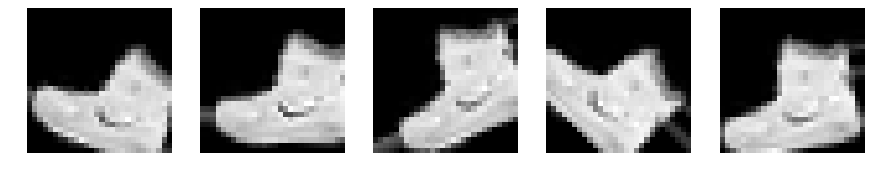

In [20]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [22]:
 
model2conv.fit_generator(
        datagen.flow(x_train, y_train, batch_size = BATCH_SIZE),
        samples_per_epoch = x_train.shape[0],
        nb_epoch = EPOCH,
        validation_data = (x_test, y_test),
        callbacks = callback_list)

Epoch 1/10
  11/1875 [..............................] - ETA: 23s - loss: 3.3203 - acc: 0.3864

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  import sys


1875/1875 [==============================] - 29s 15ms/step - loss: 0.7045 - acc: 0.7426 - val_loss: 0.3496 - val_acc: 0.8800
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.5301 - acc: 0.8034 - val_loss: 0.3284 - val_acc: 0.8885
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4790 - acc: 0.8223 - val_loss: 0.3348 - val_acc: 0.8811
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4538 - acc: 0.8316 - val_loss: 0.3181 - val_acc: 0.8927
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4314 - acc: 0.8417 - val_loss: 0.3523 - val_acc: 0.8822
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.4112 - acc: 0.8489 - val_loss: 0.3026 - val_acc: 0.8927
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4019 - acc: 0.8508 - val_loss: 0.3213 - val_acc: 0.8914
Epoch 8/10
1875/1875 [==============================] - 29s

###  Report the final train and validation accuracy

In [24]:
model2conv.evaluate(x_train, y_train)

60000/60000 [==============================] - 5s 86us/step


[0.28363443559010826, 0.89535]

In [25]:
model2conv.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 87us/step


[0.35113415158987044, 0.8791]